In [0]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import *
from sklearn.preprocessing import *
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [0]:
###############################
# A. Normalisation de données #
###############################

#-----------------------------------#
## 1- Créez	la	matrice X suivante ##
#-----------------------------------#
X = np.array([[1,-1,2],[2,0,0 ],[0,1,-1]],float)

In [0]:
#----------------------------------------------------------------------#
## 2- Visualisez	X	et	calculez	la	moyenne	et	la	variance	de	X ##
#----------------------------------------------------------------------#
print('X :\n',X)
print('Moyenne = ', X.mean())
print('Variance = ', X.var())

X :
 [[ 1. -1.  2.]
 [ 2.  0.  0.]
 [ 0.  1. -1.]]
Moyenne =  0.4444444444444444
Variance =  1.1358024691358024


In [0]:
#---------------------------------------------------------------------------------------#
## 3- Utilisez	la fonction scale pour	normaliser la	matrice	X. Que constatez	vous ? ##
#---------------------------------------------------------------------------------------#
Xnorm = scale(X)
print('Xnorm : \n', Xnorm)

Xnorm : 
 [[ 0.         -1.22474487  1.33630621]
 [ 1.22474487  0.         -0.26726124]
 [-1.22474487  1.22474487 -1.06904497]]


In [0]:
#---------------------------------------------------------------------------------#
## 4- Calculer	 la	 moyenne	 et	 la	 variance de	 la	 matrice	 X	 normalisé ##
#---------------------------------------------------------------------------------#

print('Moyenne = ', Xnorm.mean())
print('Variance = ', Xnorm.var())

#############################################################################
# ===================== Expliquez	 le	 résultat	obtenu ==================== #
# Nous avons normalisé de façon à ce que la Variance sooient égale à 1 pour #
#               réduire l'écart entre nos valeur Min et Max                 #
#############################################################################

Moyenne =  4.9343245538895844e-17
Variance =  1.0


In [0]:
###########################
# B. Normalisation MinMax #
###########################

#------------------------------------------------#
## 1- Créez	la	matrice	de	données	X2 suivante ##
#------------------------------------------------#
X2 = np.copy(X)

In [0]:
#--------------------------------------------------------------------------#
## 2- Visualisez	la	matrice	et	calculez	la	moyenne	sur	les	variables ##
#--------------------------------------------------------------------------#
print('X2 :\n',X2)
print('Moyenne = ', X2.mean())

X2 :
 [[ 1. -1.  2.]
 [ 2.  0.  0.]
 [ 0.  1. -1.]]
Moyenne =  0.4444444444444444


In [0]:
#------------------------------------------------------------------------------------#
##--------------- 3- Normalisez les données dans l’intervalle [0	1] ---------------##	 
## Visualisez	 les	 données normalisées et	calculez	la	moyenne	sur	les	variables ##	
#------------------------------------------------------------------------------------#

Xnorm2 = MinMaxScaler((0, 1)).fit_transform(X2)
print('Xnorm : \n', Xnorm2)
print('Moyenne = ', Xnorm2.mean())
print('Variance = ', Xnorm2.var())

#########################################################################
# ======================== Que	constatez-vous ? ====================== #
# MinMaxScaler normalise de la façon suivante x = (X - Min)/(Max - Min) #
#     Dans notre cas nous avons des valeurs comprise entre 0 et 1       #
#########################################################################

Xnorm : 
 [[0.5        0.         1.        ]
 [1.         0.5        0.33333333]
 [0.         1.         0.        ]]
Moyenne =  0.48148148148148145
Variance =  0.16941015089163236


In [0]:
###############################
# C. visualisation de données #
###############################

#-------------------------------#
## 1- Chargez les données Iris ##
#-------------------------------#
iris = datasets.load_iris()
data = iris.data
target = iris.target
var = iris.feature_names
target_n = iris.target_names
print(target_n)

['setosa' 'versicolor' 'virginica']


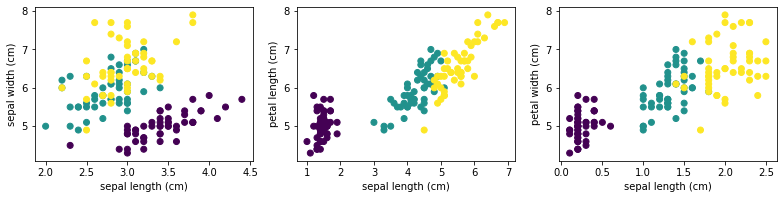

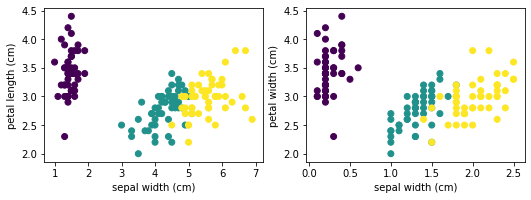

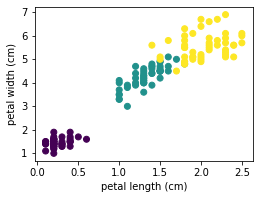

<Figure size 1296x936 with 0 Axes>

In [0]:
#-------------------------------------------------------------------------------------------#
##  2- Visualisez le nuage de points en 2D avec des couleurs correspondant aux classes en  ##
##-------------------- utilisant toutes les combinaisons de variables ---------------------##
#-------------------------------------------------------------------------------------------#
for i in range(len(var)):
  plt.figure(figsize=(18,13))
  for j in range(i+1,len(var)):
      plt.subplot(4,4,j+1)
      plt.scatter(data[:,j],data[:,i], c=iris.target)
      plt.xlabel(var[i])
      plt.ylabel(var[j])
  plt.show()

  

#########################################################################
# =============== Quelle est la meilleure	visualisation? ===============#
# ====================== Justifiez votre réponse ====================== #
#  La meilleure visualisation est PetatWidth vs SepalWidth car on voit  #
#         une bonne séparation des 3 classes sans corrélation           #
#########################################################################


In [0]:
############################################################
## D. Réduction de dimensions et visualisation de données ##
############################################################

#---------------------------------------------------------------------------------#
## 2- Les méthodes PCA et LDA peuvent etre importé à partir des package suivants ##
#---------------------------------------------------------------------------------#

pca = PCA(n_components=2)
irisPCA = pca.fit(data).transform(data)
print('irisPCA (10 premières lignes) :\n',irisPCA[:10])

irisPCA (10 premières lignes) :
 [[-2.68412563  0.31939725]
 [-2.71414169 -0.17700123]
 [-2.88899057 -0.14494943]
 [-2.74534286 -0.31829898]
 [-2.72871654  0.32675451]
 [-2.28085963  0.74133045]
 [-2.82053775 -0.08946138]
 [-2.62614497  0.16338496]
 [-2.88638273 -0.57831175]
 [-2.6727558  -0.11377425]]


In [0]:
lda = LinearDiscriminantAnalysis(n_components=2)
irisLDA = lda.fit(data, target).transform(data)
print('irisLDA (10 premières lignes):\n',irisLDA[:10])

irisLDA (10 premières lignes):
 [[ 8.06179978  0.30042062]
 [ 7.12868772 -0.78666043]
 [ 7.48982797 -0.26538449]
 [ 6.81320057 -0.67063107]
 [ 8.13230933  0.51446253]
 [ 7.70194674  1.46172097]
 [ 7.21261762  0.35583621]
 [ 7.60529355 -0.01163384]
 [ 6.56055159 -1.01516362]
 [ 7.34305989 -0.94731921]]


In [0]:
#-------------------------------------------------------------------------------------------------#
##  3- Visualisez les nuages de points avec les nouvelles axes obtenus : une image	pour l’ACP   ##
##------- et une autre pour l’ADL et utiliser la classe de Iris comme couleur de points  --------##
#-------------------------------------------------------------------------------------------------#
def affichescatter(x,y,z,t):
  color = ['navy', 'turquoise', 'darkorange']
  plt.figure()
  plt.title(t)
  for color, i, target_name in zip(color, [0, 1, 2], y):
    plt.scatter(x[y == i, 0], x[y == i, 1], color=color, alpha=.8, label=z[i])
  plt.legend(loc='best', shadow=False, scatterpoints=1)
  plt.show()

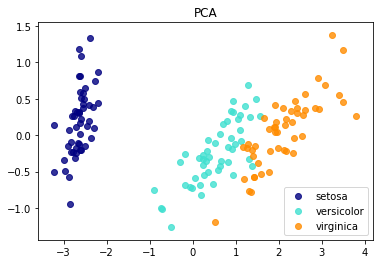

In [0]:
##########################
#---------- ACP ---------#
##########################
affichescatter(irisPCA,target,target_n,'PCA')

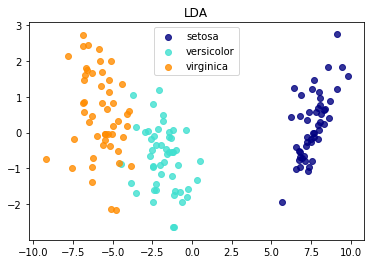

In [0]:
##########################
#---------- LDA ---------#
##########################
affichescatter(irisLDA,target,target_n,'LDA')

In [0]:
###################################################################################################
## Quelle différence constatez-vous entre les deux visualisations ? Expliquer votre raisonnement ##
##-----------------------------------------------------------------------------------------------##
# Pour IrisPCA, nous avons des données beaucoup plus proches les unes des autre (on le remarque à #
#  l'échelle) tandit que pour IrisLDA nos données sont plus éloigné. Cela est du au fait que PCA  #
#  cherche à réduire la dimension en trouvant des corréralions entre les colonnes tandis que LDA  #
#                          cherche des corrélations sur les lignes                                #
###################################################################################################